In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualization


In order to start visualizing, we need to know which questions are we gonna face:
a) What causes more deaths: provoked or unprovoked attacks?
b) At what time of the day do sharks attack the most?
c) Which activity causes more attacks?

In [15]:
new_shark = pd.read_csv('../project_1/new_shark.csv')
new_shark

,case_number,date,year,type,country,area,location,activity,name,sex,...,fatal,time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
0,2018.06.25,25-Jun-2018,2018.0,boating,USA,California,"Oceanside, San Diego County",others,Julie Wolfe,F,...,N,Afternoon,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303
1,2018.06.18,18-Jun-2018,2018.0,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",others,Adyson McNeely,F,...,N,Afternoon,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302
2,2018.06.09,09-Jun-2018,2018.0,invalid,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,...,N,Morning,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301
3,2018.06.08,08-Jun-2018,2018.0,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,...,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300
4,2018.06.04,04-Jun-2018,2018.0,provoked,MEXICO,Colima,La Ticla,diving,Gustavo Ramos,M,...,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,diving,male,M,...,Y,Unknown,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
6298,ND.0004,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,NaN,diving,Ahmun,M,...,Y,Unknown,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
6299,ND.0003,1900-1905,0.0,unprovoked,USA,North Carolina,Ocracoke Inlet,swimming,Coast Guard personnel,M,...,Y,Unknown,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
6300,ND.0002,1883-1889,0.0,unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",others,Jules Patterson,M,...,Y,Unknown,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


### a) What causes more deaths: provoked or unprovoked attacks?

First we want to analyze the number of provoked and unprovoked attacks to have a more accurate answer:

<Axes: xlabel='type', ylabel='count'>

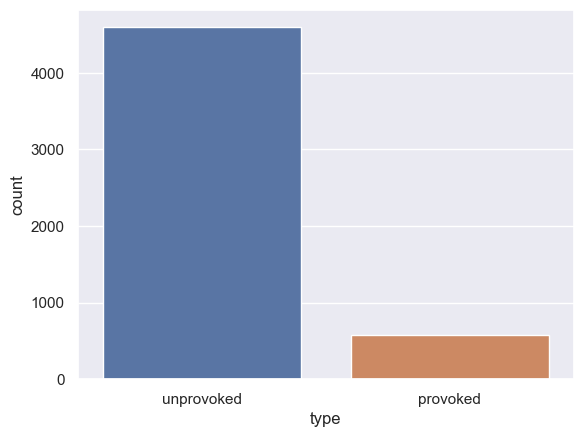

In [16]:
subset_new_shark = new_shark[new_shark["type"].isin(["provoked", "unprovoked"])]
sns.countplot(x="type", data=subset_new_shark)

Unprovoked attacks clearly outnumber provoked attacks. However, how lethal are going to be when we compare them in terms of percentage?

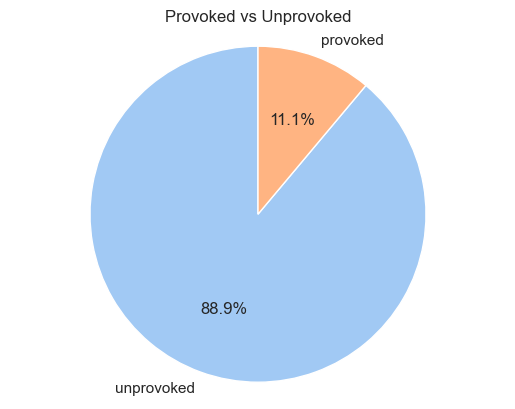

In [17]:
subset_new_shark = new_shark[new_shark["type"].isin(["provoked", "unprovoked"])]
count_by_category = subset_new_shark["type"].value_counts()
plt.pie(count_by_category, labels=count_by_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.axis('equal')  
plt.title("Provoked vs Unprovoked")
plt.show()

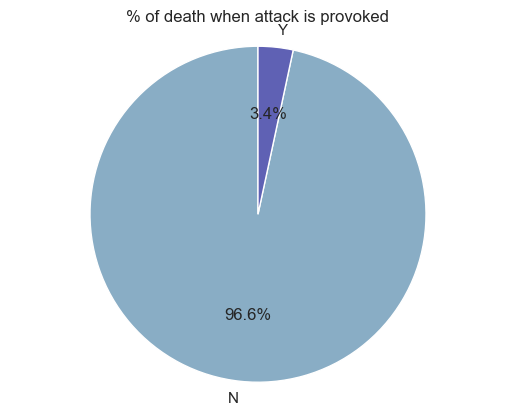

In [18]:
subset_new_shark = new_shark[(new_shark["type"].isin(["provoked"])) & (new_shark["fatal"].isin(["Y", "N"]))]
count_by_category = subset_new_shark["fatal"].value_counts()
plt.pie(count_by_category, labels=count_by_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('twilight'))
plt.axis('equal') 
plt.title("% of death when attack is provoked")
plt.show()

After that, we proceed to the visualization of provoked and unprovoked attacks that led to a decease:

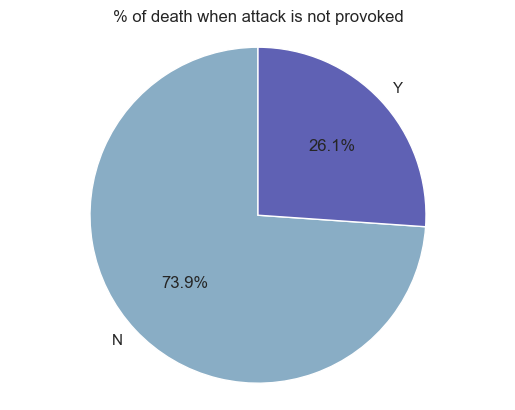

In [19]:
subset_new_shark = new_shark[(new_shark["type"].isin(["unprovoked"])) & (new_shark["fatal"].isin(["Y", "N"]))]
count_by_category = subset_new_shark["fatal"].value_counts()
plt.pie(count_by_category, labels=count_by_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('twilight'))
plt.axis('equal') 
plt.title("% of death when attack is not provoked")
plt.show()

We can appreciate that, in percentage terms, people are more likely to die when the attack is unprovoked.

### b)  At what time of the day do sharks attack the most?

To answer this question, we have divided the attacks into 3 groups: 
* Morning (04am-12am) 
* Afternoon (12am-8pm) 
* Night (8pm-04am)

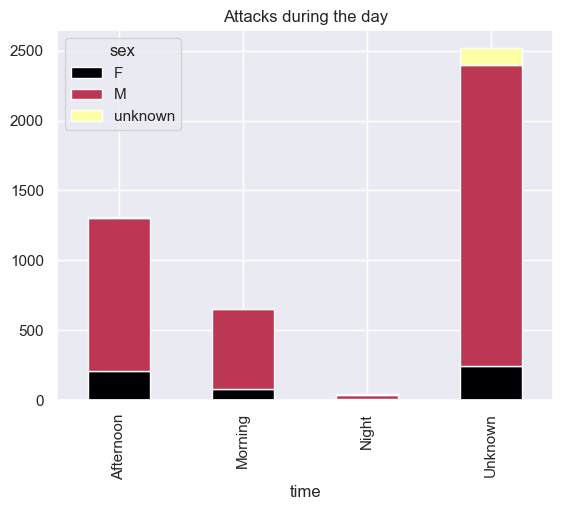

In [20]:


time_sex = subset_new_shark.groupby(["time","sex"]).size().unstack()

time_sex.plot(kind='bar', stacked=True, colormap="inferno")
plt.title("Attacks during the day")
plt.show()

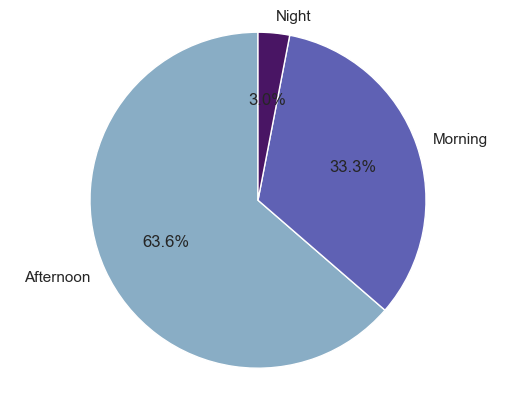

In [21]:
subset_new_shark = new_shark[new_shark["time"].isin(["Morning", "Afternoon", "Night"])]
count_by_category = subset_new_shark["time"].value_counts()
plt.pie(count_by_category, labels=count_by_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('twilight'))
plt.axis('equal')  
plt.show()

We can appreciate that:
* Most of the attacks occur in the afternoon. This makes sense since sharks sleep in the morning.
* Not many attacks happen at night. People is usually away from water activities.

### c) Which activity causes more attacks?

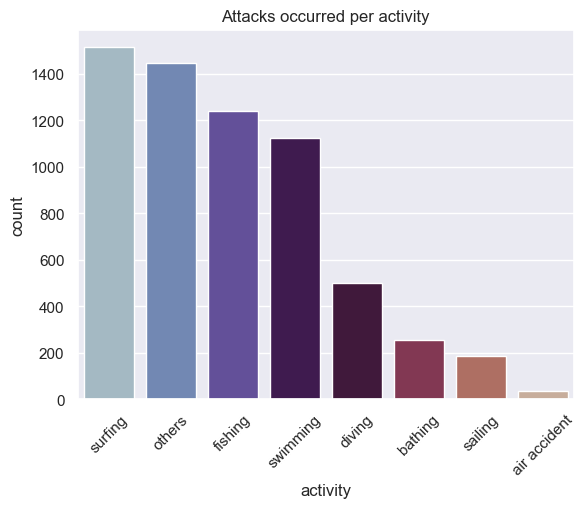

In [22]:
sns.countplot(x = new_shark["activity"], order = new_shark["activity"].value_counts().index, palette="twilight");
sns.set(font_scale=1.0)
plt.xticks(rotation=45)
plt.title("Attacks occurred per activity")
plt.show()

We can see that most of the attacks come from fishing, surfing, and swimming. 